In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from resnet import ResNet8, ResNet34

%load_ext autoreload
%autoreload 2

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


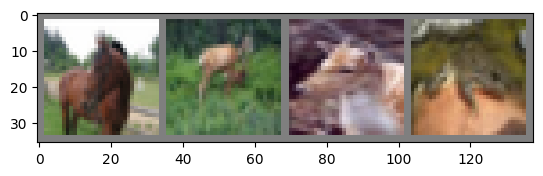

horse deer  deer  frog 


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
net = ResNet8()
PATH = 'models/cifar_resnet8_code.pth'
#net.load_state_dict(torch.load(PATH))

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-5, momentum=0.9)

net.train_model(trainloader=trainloader, testloader=testloader, criterion=criterion, optimizer=optimizer, epochs=2)

In [13]:
torch.save(net.state_dict(), 'models/cifar_resnet8.pth')

In [5]:
test_net = ResNet8()
PATH = 'models/cifar_resnet8.pth'
test_net.load_state_dict(torch.load(PATH))

criterion = torch.nn.CrossEntropyLoss()

test_net.eval_model(testloader=testloader, criterion=criterion)

Accuracy of the network on the 10000 test images: 61.12%


1.158346906554699

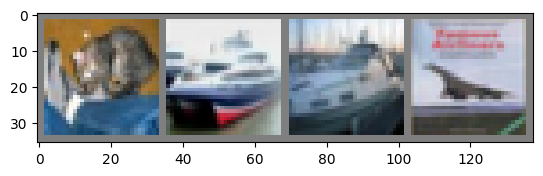

GroundTruth:  cat   ship  ship  plane


In [6]:
net = ResNet8()
PATH = 'models/cifar_resnet8.pth'
net.load_state_dict(torch.load(PATH))

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [7]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  dog   ship  ship  plane


In [8]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 71.4 %
Accuracy for class: car   is 72.0 %
Accuracy for class: bird  is 34.5 %
Accuracy for class: cat   is 35.3 %
Accuracy for class: deer  is 48.1 %
Accuracy for class: dog   is 51.4 %
Accuracy for class: frog  is 72.7 %
Accuracy for class: horse is 65.8 %
Accuracy for class: ship  is 79.4 %
Accuracy for class: truck is 73.7 %
